# Homework 5
## Due Nov. 20

### Brian Stampe

## 1. Principal Components Analysis (40 pts)

In class, we explored the concept of eigendigits, which were a more information-rich basis for representing the handwritten digits of the MNIST dataset (see course lecture notes 12).  In fact, a similar procedure can be performed for any standardized images dataset.  In this problem, we will find so-called *eigenfaces*, which are pretty much as they sound: the principal components of a face dataset.  The faces that we will use can be found in the so-called 'labelled faces in the wild' data set.  This can be downloaded via the scikit-learn module as follows:

In [18]:
import matplotlib.pyplot as plt
from __future__ import division 
#%matplotlib notebook
import numpy as np
from sklearn.datasets import fetch_lfw_people

# Download labelled faces in the wild (only examples for which there are more than 50 examples)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.7)

# Interrogate the data for the size of the images (h,w) 
m, h, w = lfw.images.shape

# For our purposes, as in MNIST, we will use a flattened version of the pixels
X = lfw.data
n = X.shape[1]

y = lfw.target

names = lfw.target_names
names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [19]:
#X[0].reshape(87,65)[0]

<IPython.core.display.Javascript object>


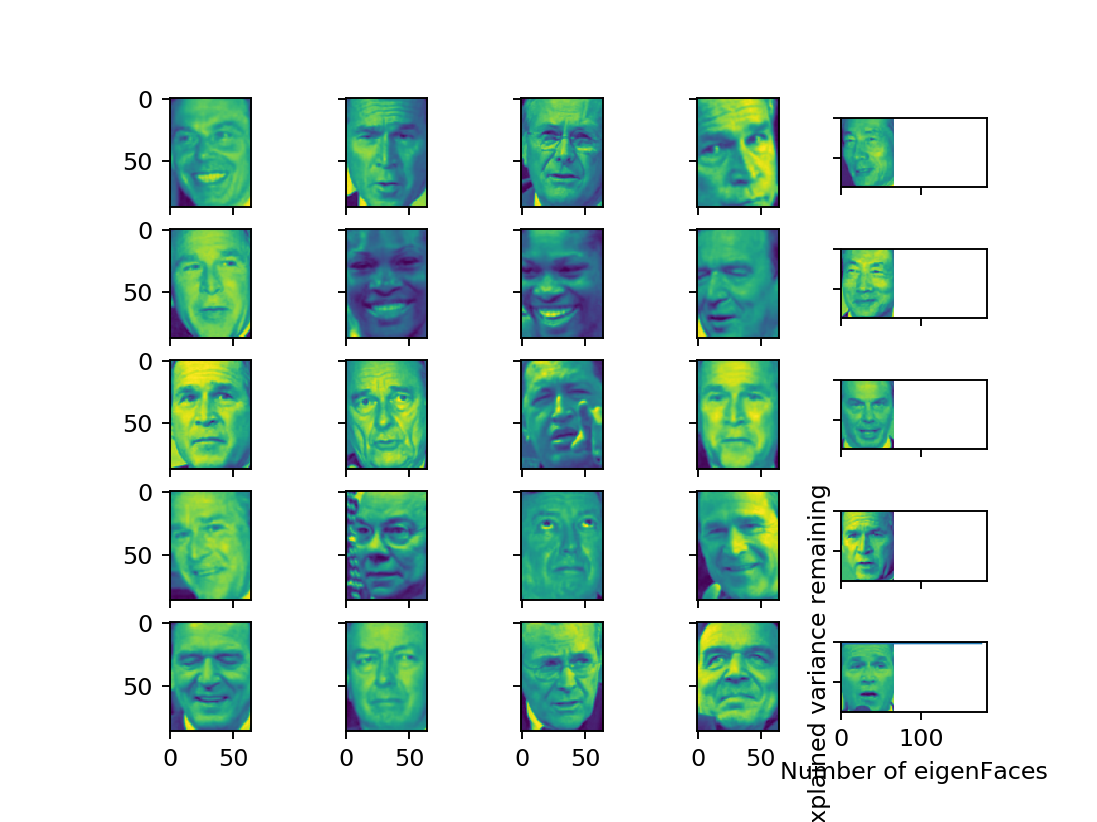

In [20]:
# Dougs code from lecture notes, but changed for lfw
# Straight up images

fig,axs = plt.subplots(nrows=5,ncols=5,sharex='col',sharey='row')
for r in axs:
    for ax in r:
        ax.imshow(lfw.data[np.random.randint(len(lfw.data)),:].reshape((87,65)))
plt.show()

Since the second problem in this homework deals with classification, let's split the LFW data into a training and test dataset.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

### 1.1
Using either your own implementation or the implementation given by scikit-learn, **perform a principal components analysis on the LFW data, retaining sufficient components to explain 95% of the total data variance (10pts).**  To prove that your PCA is successfully capturing this level of variability, **Generate a scree plot showing the cumulative explained variance as a function of number of principal components (10pts).**

In [22]:
from sklearn import decomposition

pca = decomposition.PCA(.95,copy=True)  
pca.fit(X_train.data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(1-cumulative_variance_ratio)
plt.ylabel('Unexplained variance remaining')
plt.xlabel('Number of eigenFaces')
plt.show()

### 1.2
**Visualize the first five eigenfaces by reshaping the resulting principal components into images and plotting them (10pts).**

<IPython.core.display.Javascript object>


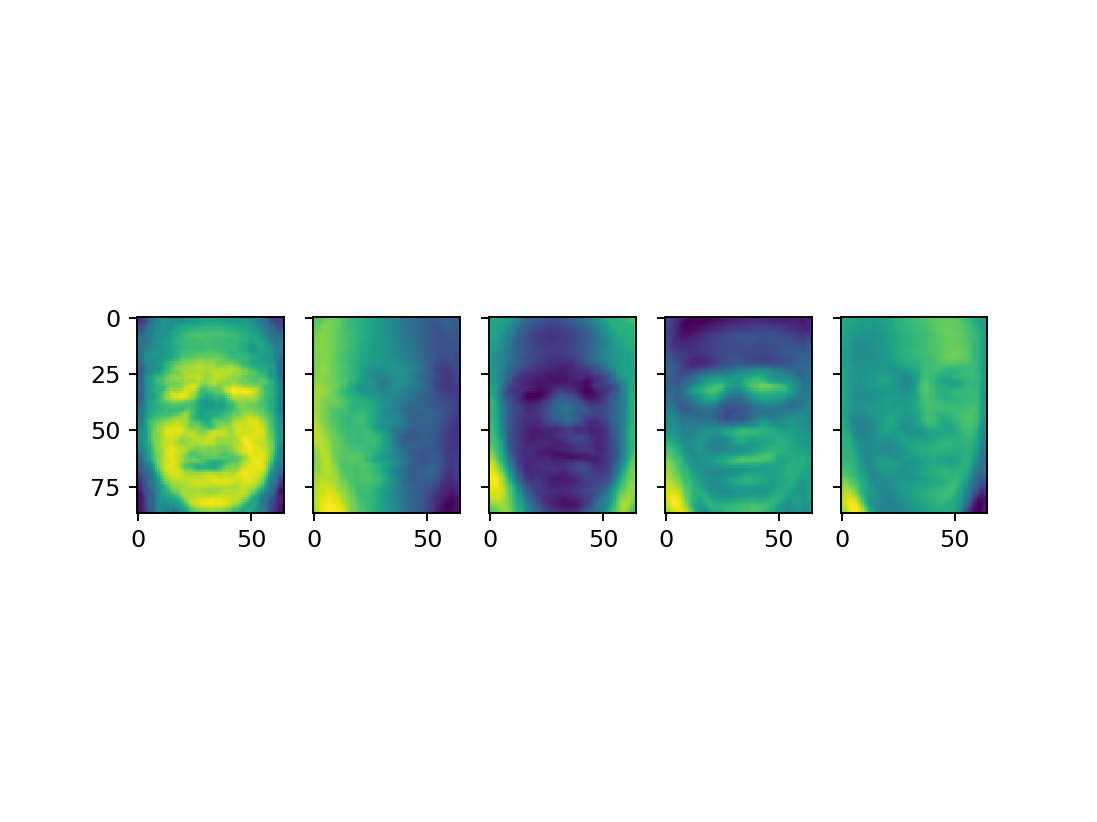

<IPython.core.display.Javascript object>


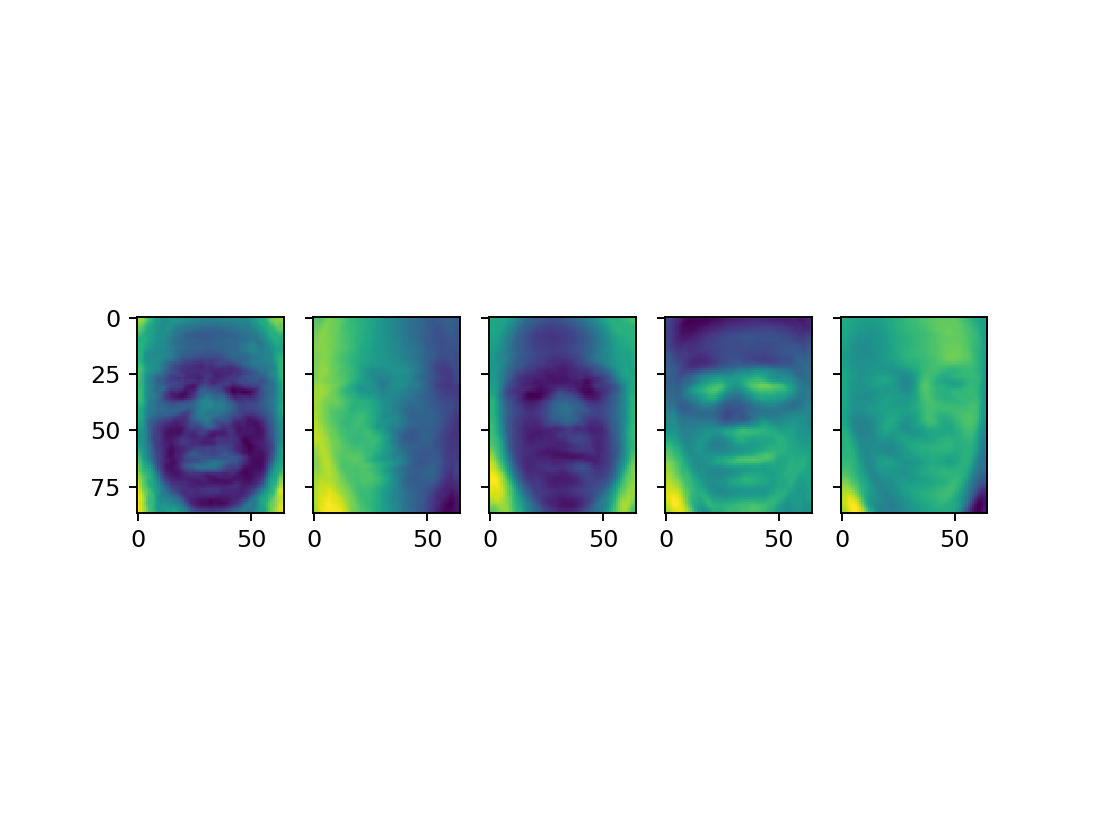

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=5,sharex='col', sharey='row')
counter = 0
for ax in axs:
        norm = pca.components_[counter,:] - pca.components_[counter,:].min()
        norm = norm/pca.components_[counter,:].max()
        ax.imshow(norm.reshape(87,65))
        counter+=1
plt.show()

fig,axs = plt.subplots(nrows=1,ncols=5,sharex='col', sharey='row')
counter = 0
for ax in axs:
        
        ax.imshow(pca.components_[counter,:].reshape(87,65))
        counter+=1
plt.show()

### 1.3 (Turn in the following question on Moodle)
(10pts) Consider the following two datasets (X_1 and X_2), each with three dimensions.  How many principal components do you expect each to have?  How do you know?

<IPython.core.display.Javascript object>


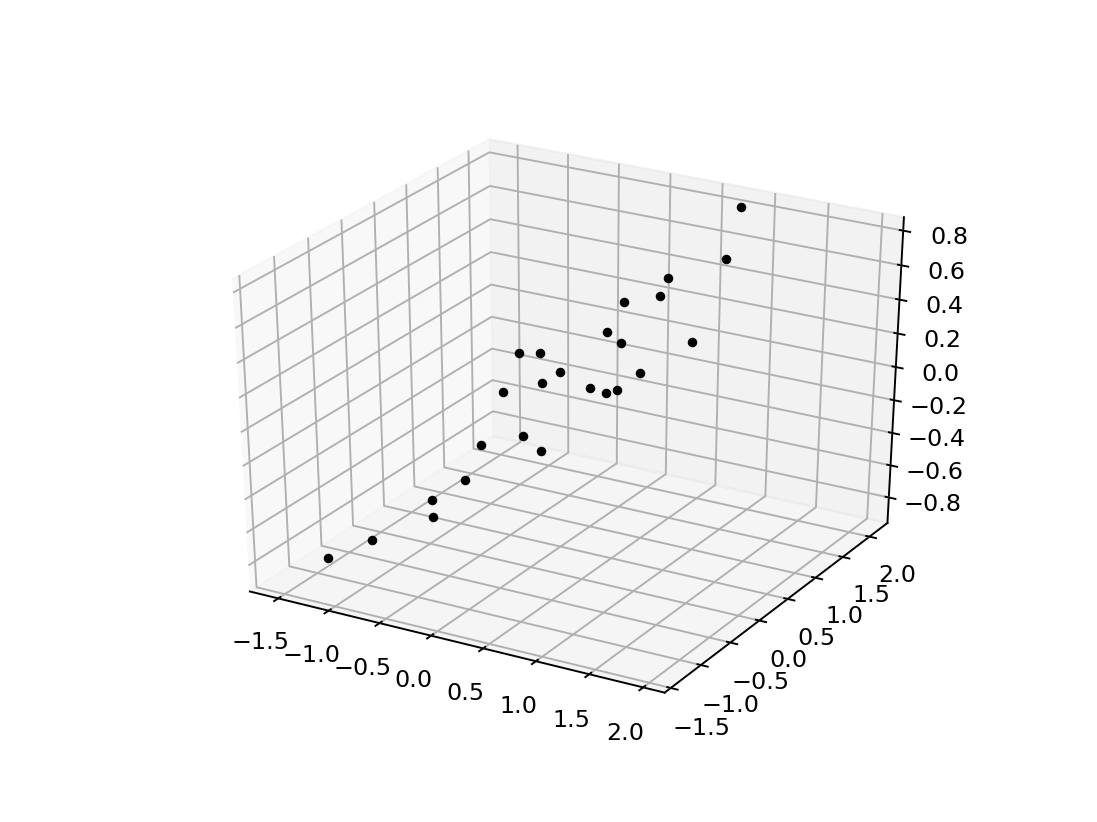

<IPython.core.display.Javascript object>


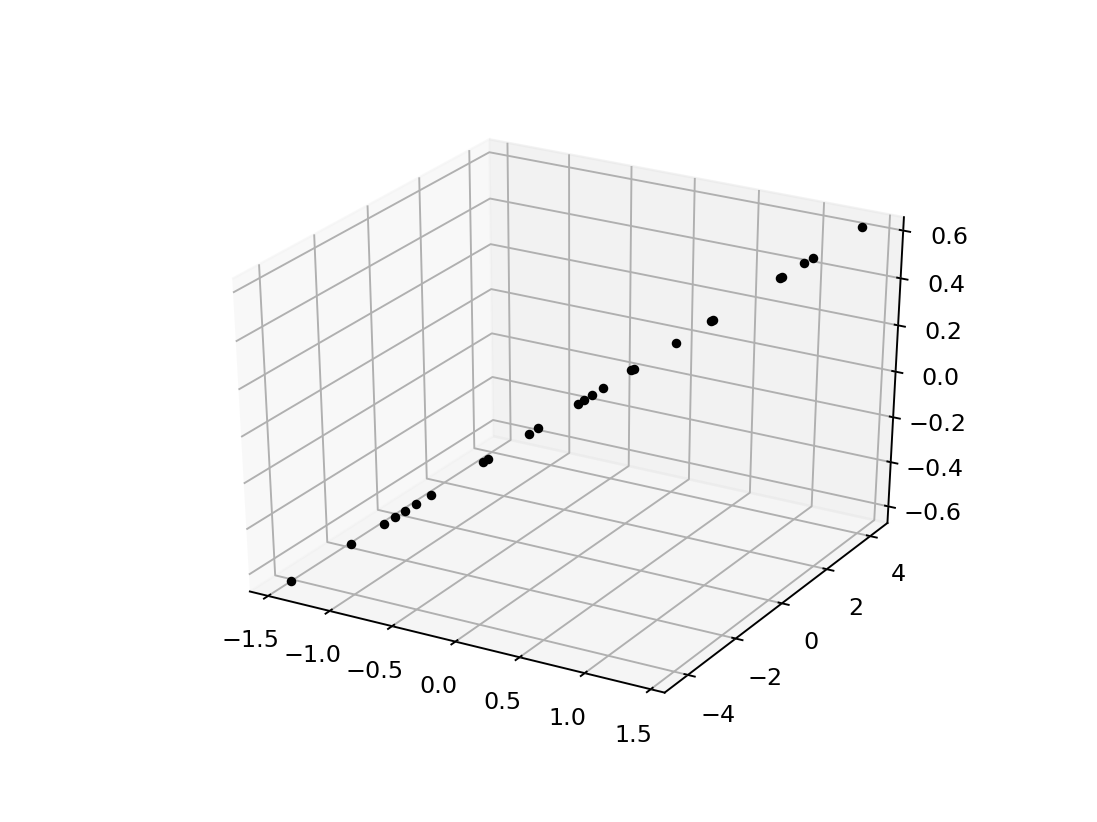

In [25]:
X_1 = np.array([[ 0.24658525,  0.846718  ,  0.29263623],
       [ 1.94365644, -0.78759333,  0.81430956],
       [ 0.54530612,  1.33540717,  0.53973449],
       [ 0.08287299,  1.41172682,  0.32378186],
       [ 1.16505735, -0.76913387,  0.4287019 ],
       [ 0.80324671, -0.3969266 ,  0.32223804],
       [ 0.30891776, -0.62816207,  0.02882647],
       [ 0.68643482,  0.95395446,  0.5340083 ],
       [-1.1862806 ,  1.80433744, -0.23227281],
       [ 1.31814933, -0.86135592,  0.48680348],
       [-0.01355747,  0.52411544,  0.09804436],
       [-0.94016758, -1.00530368, -0.67114452],
       [-1.53088917, -0.79227508, -0.9238996 ],
       [ 0.87683622, -1.29639414,  0.17913928],
       [-0.34180964, -0.21053314, -0.21301145],
       [-0.40673884, -0.89787012, -0.38294344],
       [-0.74792211,  1.42602549, -0.08875596],
       [-0.10994822, -1.34930993, -0.3248361 ],
       [-0.09104714, -0.87550541, -0.22062465],
       [-0.18231387,  0.51312677,  0.01146842],
       [ 1.48119305, -0.77899653,  0.58479722],
       [ 0.67944609,  0.31732884,  0.40318881],
       [ 0.8137745 ,  2.09032765,  0.82495278],
       [-0.81678612,  0.9302194 , -0.22234918],
       [ 1.32824051,  0.88054246,  0.84022875]])

X_2 = np.array([[ 9.97897650e-01,  2.99369295e+00,  4.49053943e-01],
       [-9.19396971e-01, -2.75819091e+00, -4.13728637e-01],
       [ 2.63408733e-01,  7.90226199e-01,  1.18533930e-01],
       [ 1.23229118e-01,  3.69687353e-01,  5.54531030e-02],
       [ 1.00365433e+00,  3.01096300e+00,  4.51644450e-01],
       [-9.73346396e-01, -2.92003919e+00, -4.38005878e-01],
       [-2.48058203e-01, -7.44174610e-01, -1.11626192e-01],
       [-1.14257767e+00, -3.42773300e+00, -5.14159949e-01],
       [-4.51139403e-01, -1.35341821e+00, -2.03012732e-01],
       [-2.01440713e-01, -6.04322138e-01, -9.06483206e-02],
       [ 1.15492027e+00,  3.46476081e+00,  5.19714121e-01],
       [ 6.86908285e-02,  2.06072486e-01,  3.09108728e-02],
       [-4.73749885e-01, -1.42124965e+00, -2.13187448e-01],
       [ 1.11404171e+00,  3.34212513e+00,  5.01318770e-01],
       [-8.13230322e-01, -2.43969096e+00, -3.65953645e-01],
       [-8.70193912e-01, -2.61058174e+00, -3.91587261e-01],
       [ 6.55592608e-01,  1.96677783e+00,  2.95016674e-01],
       [ 2.88671096e-02,  8.66013288e-02,  1.29901993e-02],
       [ 6.64698327e-01,  1.99409498e+00,  2.99114247e-01],
       [ 4.83556414e-01,  1.45066924e+00,  2.17600386e-01],
       [ 2.74450530e-01,  8.23351591e-01,  1.23502739e-01],
       [-2.38147337e-03, -7.14442010e-03, -1.07166302e-03],
       [ 1.39721186e+00,  4.19163557e+00,  6.28745336e-01],
       [-1.44265778e+00, -4.32797333e+00, -6.49196000e-01],
       [-7.39010087e-01, -2.21703026e+00, -3.32554539e-01]])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*X_1.T,'k.')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*X_2.T,'k.')

## 2. Logistic (actually Softmax) Regression (30pts)

To explore the use of logistic regression, we will again use labelled faces in the wild.  For this problem, fit the PCA-transformed training data using a logistic regression model.  To begin with you'll need to transform both the test and training datasets into the PCA basis.

In [26]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Now that we have our transformed features, we can implement logistic regression.  Rather than come up with our own, let's use the sklearn implementation, which is quite good:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

### 2.1
Before you begin, there are a few keyword arguments that you will want to provide to this function.  First, you'll want to give it the command multi_class='multinomial'.  This causes the classifier to perform true softmax regression, rather than a strange n-fold 1-vs-many binary logistic regression scheme.  Second, you should set the keyword argument to solver='lbfgs'.  **Fit a logistic regression model to your training data** 

In [28]:
log_reg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
log_reg.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### 2.2
**After fitting your model, classify the test set, and print a confusion matrix and the overall accuracy**

In [29]:
y_test_pred = log_reg.predict(X_test_pca)
c = confusion_matrix(y_test, y_test_pred)
print ("Confusion Matrix: \n", c)
print ("Prediction Accuracy: \n",
       np.round(100*len(y_test[y_test == y_test_pred]) / len(y_test)))
#print (np.diagonal(c).sum()/c.sum())

Confusion Matrix: 
 [[ 17   3   1   1   0   0   1   1   0   0   1   0]
 [  1  63   1   1   0   0   0   0   2   1   3   0]
 [  3   2  27   7   0   1   1   1   0   0   0   1]
 [  5   6   3 133   5   6   4   2   2   0   2  10]
 [  0   0   1   3  27   3   0   0   0   1   0   7]
 [  0   0   0   1   0  21   0   0   1   0   0   2]
 [  0   1   1   0   2   0  10   1   0   0   0   0]
 [  0   1   4   1   0   1   0  14   0   0   0   1]
 [  0   2   0   0   0   0   0   0  12   0   0   1]
 [  0   1   0   1   0   0   0   0   1  13   0   1]
 [  0   2   0   1   0   0   0   0   1   1  10   0]
 [  0   0   1   0   1   1   0   0   1   0   3  39]]
Prediction Accuracy: 
 75.0


### 2.3
By default, sklearn applies regularization to this problem, penalizing large parameter values.  You can control the degree of regularization by using the C=1e-4 keyword argument (or C=1e-6 or whatever).  However, it is not always clear what the best regularization should be.  To deal with this problem, sklearn offers the function LogisticRegressionCV, which automatically runs [k-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) on a user-specified range of regularization parameters, and selects the one which minimizes the classification error.  Otherwise, it works just like LogisticRegression.  ***Use this function to determine the optimal value of the regularization parameter C, and report your classification accuracy with this new value.  Does regularization appreciably improve your classification accuracy? *** 

*HINT 1: A good range to check over is from $C=1$ to $C=10^{-11}$.  You'll want the regularization values that you test to be distributed logarithmically, e.g. via the numpy logspace command.*  

In [30]:
regularizer = np.logspace(-11, -1, num=10)

In [31]:
sklearn.linear_model.LogisticRegressionCV?
log_reg_CV = LogisticRegressionCV(Cs=regularizer, cv=2, random_state=0, multi_class='multinomial')
log_reg_CV.fit(X_train_pca, y_train)


Object `sklearn.linear_model.LogisticRegressionCV` not found.


LogisticRegressionCV(Cs=array([1.00000e-11, 1.29155e-10, 1.66810e-09, 2.15443e-08, 2.78256e-07,
       3.59381e-06, 4.64159e-05, 5.99484e-04, 7.74264e-03, 1.00000e-01]),
           class_weight=None, cv=2, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=0, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [32]:
y_test_pred = log_reg_CV.predict(X_test_pca)
c = confusion_matrix(y_test, y_test_pred)
print ("Confusion Matrix with regularization: \n", c)
print ("Prediction Accuracy with regularization: \n",
       np.round(100*len(y_test[y_test == y_test_pred]) / len(y_test),1))
#print (np.diagonal(c).sum()/c.sum())

Confusion Matrix with regularization: 
 [[ 18   3   2   1   0   0   0   0   0   0   1   0]
 [  4  64   0   4   0   0   0   0   0   0   0   0]
 [  2   4  28   7   0   1   0   0   0   0   0   1]
 [  1   7   2 161   2   1   1   0   0   0   1   2]
 [  0   0   1   3  29   3   0   0   1   0   0   5]
 [  0   0   0   1   0  23   0   0   1   0   0   0]
 [  0   1   4   1   0   0   9   0   0   0   0   0]
 [  0   2   5   1   0   0   0  14   0   0   0   0]
 [  0   2   0   1   0   0   0   0  11   0   0   1]
 [  0   1   0   1   0   0   0   0   1  14   0   0]
 [  0   2   0   2   0   0   0   0   0   0  11   0]
 [  0   0   0   5   1   0   0   0   1   0   0  39]]
Prediction Accuracy with regularization: 
 81.7


## 3. This time in color (20 pts)(GRAD STUDENTS ONLY)

In the above two problems, we ignored one of the feature dimensions: color.  In fact, every element of the LFW dataset is a color image (previously we averaged the bands).  Rerun the above process of performing a PCA and classifying via logistic regression, but this time import the data using

In [78]:
# Download labelled faces in the wild (only examples for which there are more than 50 examples)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.7, color=True)

In [79]:
# Interrogate the data for the size of the images (h,w) 
image, height, width, color = lfw.images.shape

# For our purposes, as in MNIST, we will use a flattened version of the pixels
X = lfw.data.astype(int) # change to int so basic imshow doesn't clip thinking its float      
n = X.shape[1]

y = lfw.target

image, height, width, color, n, y.shape, lfw.images.shape, X.shape



(1560, 87, 65, 3, 16965, (1560,), (1560, 87, 65, 3), (1560, 16965))

<IPython.core.display.Javascript object>


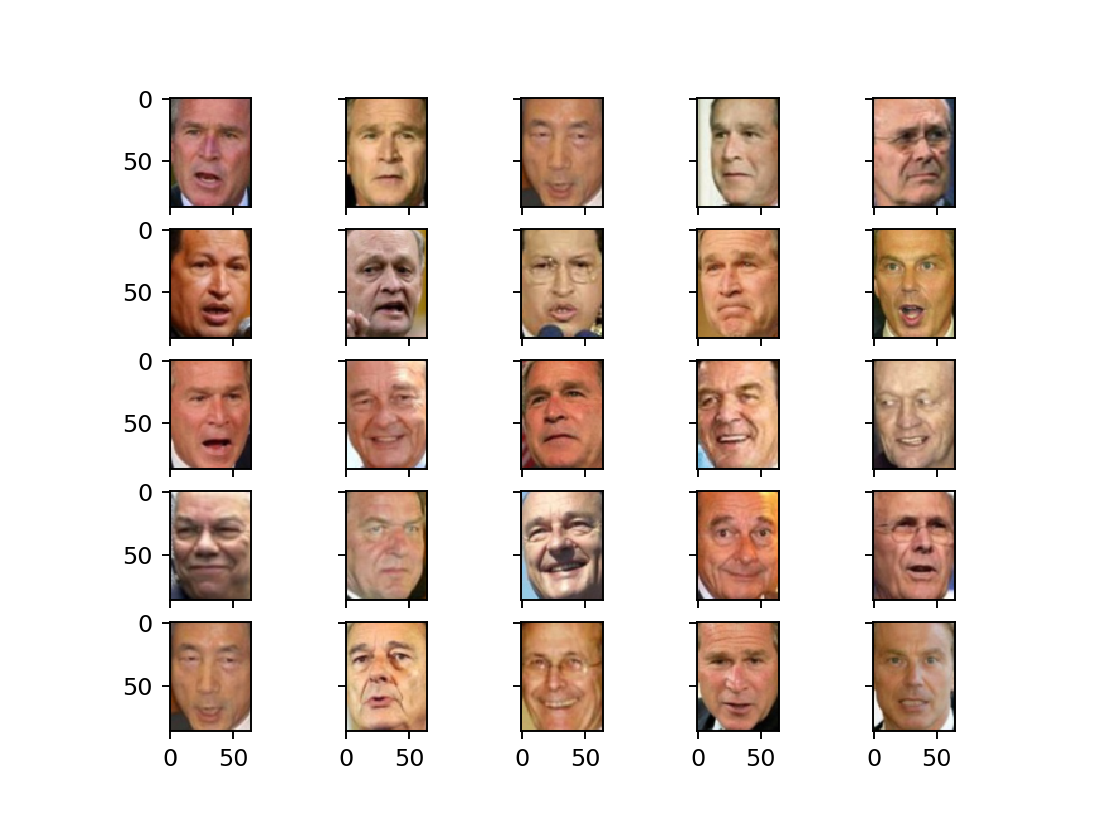

In [80]:
fig,axs = plt.subplots(nrows=5,ncols=5,sharex='col',sharey='row')
for r in axs:
    for ax in r:
        ax.imshow(X[np.random.randint(len(lfw.data)),:].reshape((87,65,3)))
plt.show()

In [36]:
#X[0].reshape(87,65,3)[0][0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

You will have to modify your code to account for data with different dimensions.  You will also have to think a bit about how to display principal component arrays, since when displaying a 3-band image matplotlib will expect 8 bit integer arrays.  **Can you achieve better classification accuracy using the color dataset?**

In [81]:
pca = decomposition.PCA(.95,copy=True)  # defining PCA parameters
pca.fit(X_train.data) # give training data, to calc covariance and do svd decomp to fi3nd eig
                    # eigenvectors/values for the covariance matrix which describe
                    # direction and magnitude of the most variable axis of the assumed MVN
                    # distribution of the data

X_train_pca = pca.transform(X_train)  # apply the linear transformation to the data
X_test_pca = pca.transform(X_test)


In [95]:
X_experiment = pca.inverse_transform(X_train_pca)
print (X_experiment[0][3],X_train[0][3])

139.5114171615513 135


In [38]:
log_reg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
log_reg.fit(X_train_pca, y_train) # tune logistic funciton to training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# now predict on the test set

y_test_pred = log_reg.predict(X_test_pca)
C = confusion_matrix(y_test, y_test_pred)
print ("Confusion Matrix: \n", C)
print ("Prediction Accuracy: \n",
       np.round(100*np.diagonal(C).sum()/c.sum()))


Confusion Matrix: 
 [[ 21   1   1   3   0   0   0   1   0   0   1   0]
 [  1  66   0   1   0   0   1   2   0   1   0   1]
 [  0   1  27   3   1   0   0   1   0   0   1   0]
 [  0   6   3 146   5   4   2   1   0   1   0   9]
 [  1   0   0   4  28   0   0   0   0   0   0   0]
 [  1   1   0   4   2  17   0   0   0   0   0   0]
 [  2   1   6   1   0   0  10   2   0   0   0   1]
 [  1   0   2   0   0   0   0  10   0   0   0   0]
 [  0   3   0   2   4   0   0   0  10   0   0   1]
 [  0   0   0   1   1   0   0   0   1  18   0   0]
 [  0   1   1   2   0   0   0   0   0   1  14   0]
 [  1   1   1   1   3   1   3   2   2   0   1  33]]
Prediction Accuracy: 
 78.0


In [40]:
log_reg_CV = LogisticRegressionCV(Cs=regularizer, cv=2, random_state=0, multi_class='multinomial')
log_reg_CV.fit(X_train_pca, y_train)
print (log_reg_CV.C_)

[3.59381366e-06 3.59381366e-06 3.59381366e-06 3.59381366e-06
 3.59381366e-06 3.59381366e-06 3.59381366e-06 3.59381366e-06
 3.59381366e-06 3.59381366e-06 3.59381366e-06 3.59381366e-06]


In [41]:
y_test_pred = log_reg_CV.predict(X_test_pca)
c = confusion_matrix(y_test, y_test_pred)
print ("Confusion Matrix with regularization: \n", c)
print ("Prediction Accuracy with regularization: \n",
       np.round(100*len(y_test[y_test == y_test_pred]) / len(y_test),1))
#print (np.diagonal(c).sum()/c.sum())

Confusion Matrix with regularization: 
 [[ 23   2   1   1   0   0   0   0   0   0   1   0]
 [  2  68   0   1   0   0   0   0   0   0   0   2]
 [  1   2  27   1   1   0   0   1   0   0   1   0]
 [  0   6   5 154   3   1   1   0   0   0   0   7]
 [  1   0   0   4  28   0   0   0   0   0   0   0]
 [  1   0   0   4   1  19   0   0   0   0   0   0]
 [  1   2   4   3   1   0   7   2   1   0   0   2]
 [  0   0   1   0   0   0   0  12   0   0   0   0]
 [  0   3   0   4   3   0   0   0   9   0   0   1]
 [  0   0   0   1   1   0   0   0   1  18   0   0]
 [  0   1   0   2   0   1   0   0   1   0  14   0]
 [  0   1   2   2   3   0   0   1   2   0   1  37]]
Prediction Accuracy with regularization: 
 80.8


Regularizing with an optimal Cs improves the accuracy a tiny bit. 

In [42]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(1-cumulative_variance_ratio)
plt.ylabel('Unexplained variance remaining')
plt.xlabel('Number of eigenFaces')
plt.show()

<IPython.core.display.Javascript object>


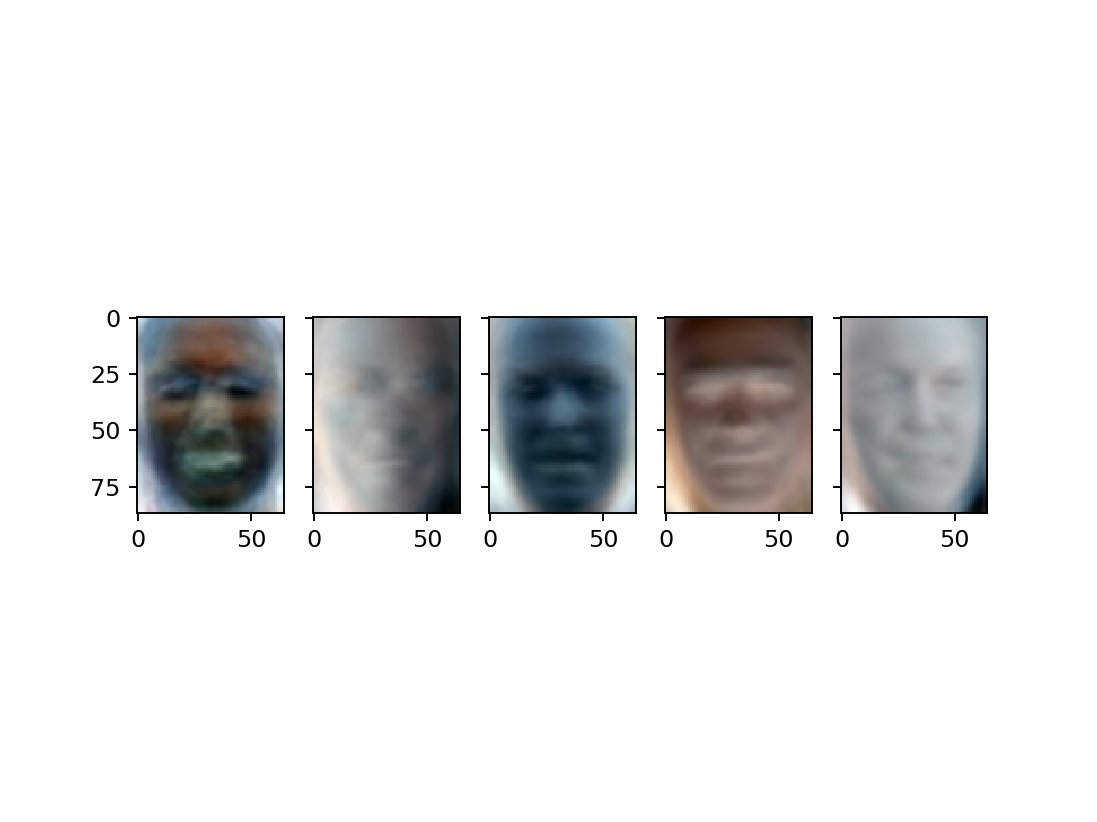

In [43]:
fig,axs = plt.subplots(nrows=1,ncols=5,sharex='col', sharey='row')
counter = 0
for ax in axs:
        shift = pca.components_[counter,:] - pca.components_[counter,:].min() # shift
        norm = shift/shift.max() # scale # this isn't quite right.. how to re shift and scale?
        ax.imshow(norm.reshape(87,65,3))
        counter+=1
        #print (pca.components_[counter,:].reshape(87,65,3))
plt.show()

Still trying to figure out exactly how to reshift and scale the pca.components_. These need to be shifted back somehow, but we are in pca space instead of the original feature space. So there is likely some projection trick.

In [44]:
print (pca.components_.max(),pca.components_.min())

0.05264512237922292 -0.05260566066673767


In [45]:
shifted = (pca.components_ - pca.components_.min()) 
shifted = shifted / shifted.max()


In [57]:
print (pca.components_[0].reshape(87,65,3))

[[[-0.0031336  -0.00258569 -0.00189695]
  [-0.00335055 -0.00268121 -0.00195111]
  [-0.00360575 -0.00285341 -0.00207293]
  ...
  [-0.00344604 -0.00322084 -0.0025391 ]
  [-0.00335427 -0.00327879 -0.00260706]
  [-0.0029702  -0.00300402 -0.00233752]]

 [[-0.00328704 -0.00268819 -0.00201909]
  [-0.00347855 -0.00277721 -0.00206136]
  [-0.00385616 -0.00308731 -0.00230386]
  ...
  [-0.00357676 -0.00331353 -0.00264013]
  [-0.003591   -0.00345361 -0.00280502]
  [-0.00334803 -0.00333725 -0.00270347]]

 [[-0.00349057 -0.00285563 -0.00219912]
  [-0.00377358 -0.00305486 -0.00235205]
  [-0.00423791 -0.00342866 -0.00266495]
  ...
  [-0.00363479 -0.00334305 -0.00270308]
  [-0.00371425 -0.00354014 -0.00292701]
  [-0.00359289 -0.00355107 -0.00296179]]

 ...

 [[-0.0015975  -0.0018424  -0.00160767]
  [-0.00185498 -0.00201729 -0.00176129]
  [-0.00213573 -0.00224937 -0.00198267]
  ...
  [-0.00262685 -0.00255485 -0.00261278]
  [-0.00226502 -0.00221342 -0.00226235]
  [-0.001979   -0.00195808 -0.0020318 ]]

 [

In [65]:
pca.mean_[0], lfw.data[0].mean()

(105.76459330143541, 112.49655)

In [61]:
lfw.data[0].mean()
#lfw.data[1].mean()
#lfw.data[2].mean()

98.90215

In [ ]:
pca.transform